In [1]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

import pandas as pd



/Users/karthickkumarasamy/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:

# Load your dataset
df = pd.read_csv("synthetic_5g_qos_dataset_10000.csv")  # replace with your actual file


In [3]:

# Label Encoding for categorical features
le_ip_src = LabelEncoder()
le_ip_dst = LabelEncoder()
le_proto = LabelEncoder()
le_qos = LabelEncoder()

df['source_ip_enc'] = le_ip_src.fit_transform(df['source_ip'])
df['destination_ip_enc'] = le_ip_dst.fit_transform(df['destination_ip'])
df['protocol_enc'] = le_proto.fit_transform(df['protocol'])
df['qos_class_enc'] = le_qos.fit_transform(df['qos_class'])


In [4]:

# Define features and target
features = ['source_ip_enc', 'destination_ip_enc', 'protocol_enc', 'packet_size', 'inter_arrival_time_ms', 'jitter_ms']
target = 'qos_class_enc'

X = df[features]
y = df[target]


In [5]:

# Scale features (important for SVM)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [6]:

# Train/Test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [7]:
# Train SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale')  # You can tune C and gamma
svm_model.fit(X_train, y_train)

# Predict
y_pred = svm_model.predict(X_test)

# Evaluate
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.988
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       693
           1       0.99      0.99      0.99       662
           2       1.00      0.99      0.99       645

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

# Define parameter grid
param_grid = {
    'C': [0.1, 1, 10],
    'gamma': ['scale', 'auto', 0.01, 0.001],
    'kernel': ['rbf', 'linear', 'poly']
}

# Initialize base model
svc = SVC()

# Grid Search
grid_search = GridSearchCV(svc, param_grid, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters:", grid_search.best_params_)
print("Best CV Accuracy:", grid_search.best_score_)

# Use best model to predict
best_svm = grid_search.best_estimator_
y_pred = best_svm.predict(X_test)

# Evaluation
from sklearn.metrics import classification_report, accuracy_score
print("Test Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Fitting 5 folds for each of 36 candidates, totalling 180 fits


/Users/karthickkumarasamy/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/karthickkumarasamy/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/karthickkumarasamy/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/karthickkumarasamy/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (
/Users/karthickkumarasamy/anaconda3/lib/python3.11/site-pack

Best Parameters: {'C': 10, 'gamma': 'scale', 'kernel': 'linear'}
Best CV Accuracy: 0.9875
Test Accuracy: 0.9885
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.99      0.98       693
           1       0.99      0.99      0.99       662
           2       1.00      0.99      0.99       645

    accuracy                           0.99      2000
   macro avg       0.99      0.99      0.99      2000
weighted avg       0.99      0.99      0.99      2000



<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

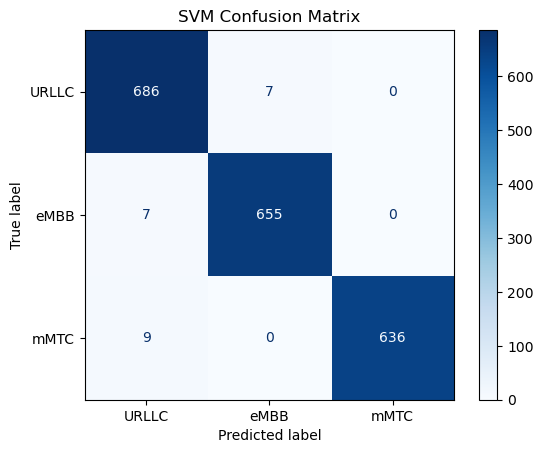

In [9]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred)
class_names = le_qos.inverse_transform(sorted(y.unique()))

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap='Blues')
plt.title("SVM Confusion Matrix")
plt.show()


In [10]:
from sklearn.decomposition import PCA

# Apply PCA before SVM
pca = PCA(n_components=2)  # or n_components=0.95 to keep 95% variance
X_pca = pca.fit_transform(X_scaled)

# Re-split and retrain with PCA features
X_train_pca, X_test_pca, y_train_pca, y_test_pca = train_test_split(X_pca, y, test_size=0.2, random_state=42)

svm_pca = SVC(kernel='rbf', C=1.0, gamma='scale')
svm_pca.fit(X_train_pca, y_train_pca)
y_pred_pca = svm_pca.predict(X_test_pca)

print("PCA-based SVM Accuracy:", accuracy_score(y_test_pca, y_pred_pca))


PCA-based SVM Accuracy: 0.9335


# SVM with PCA + Decision Boundary Plot

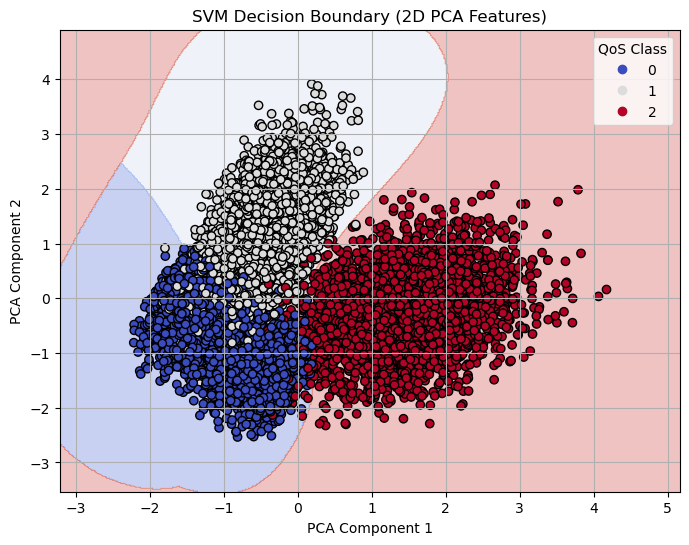

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Assume df is already loaded and label-encoded as earlier
# Encode QoS class
le_qos = LabelEncoder()
df['qos_class_enc'] = le_qos.fit_transform(df['qos_class'])

# Feature list
features = ['source_ip_enc', 'destination_ip_enc', 'protocol_enc', 'packet_size', 'inter_arrival_time_ms', 'jitter_ms']
X = df[features]
y = df['qos_class_enc']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Reduce to 2D with PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Split
X_train, X_test, y_train, y_test = train_test_split(X_pca, y, test_size=0.2, random_state=42)

# Train SVM
svm = SVC(kernel='rbf', C=1.0, gamma='scale')
svm.fit(X_train, y_train)

# Plotting the decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict on mesh grid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot
plt.figure(figsize=(8, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)

# Plot training points
scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('SVM Decision Boundary (2D PCA Features)')
plt.legend(*scatter.legend_elements(), title="QoS Class")
plt.grid(True)
plt.show()



📄 Macro Average AUC: 0.9862
📄 Weighted Average AUC: 0.9860


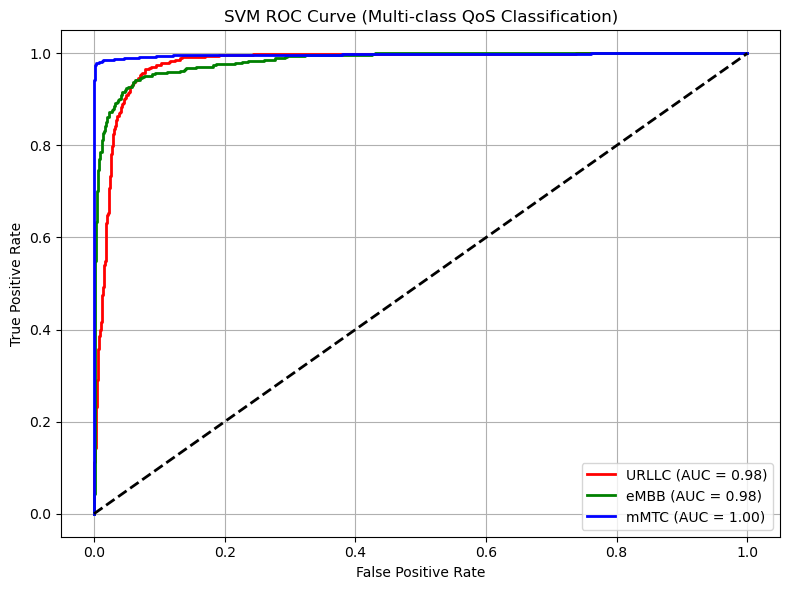

In [16]:
from sklearn.metrics import roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
from itertools import cycle

# Enable probability output in SVM
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', probability=True)
svm_model.fit(X_train, y_train)

# Predict probabilities
y_score = svm_model.predict_proba(X_test)

# Binarize the true labels
n_classes = len(np.unique(y))
y_test_bin = label_binarize(y_test, classes=np.arange(n_classes))

# Compute ROC curve and AUC for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
auc_scores = []

for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
    auc_scores.append(roc_auc[i])

# Print macro and weighted AUC
macro_auc = np.mean(auc_scores)
weighted_auc = roc_auc_score(y_test_bin, y_score, average='weighted', multi_class='ovr')
print(f"\n📄 Macro Average AUC: {macro_auc:.4f}")
print(f"📄 Weighted Average AUC: {weighted_auc:.4f}")

# Plot ROC Curves
qos_labels = le_qos.inverse_transform(np.arange(n_classes))
colors = cycle(['red', 'green', 'blue'])

plt.figure(figsize=(8, 6))
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label=f"{qos_labels[i]} (AUC = {roc_auc[i]:.2f})")

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("SVM ROC Curve (Multi-class QoS Classification)")
plt.legend(loc="lower right")
plt.grid(True)
plt.tight_layout()
plt.show()
